## libraries

In [573]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

from mpl_toolkits.mplot3d import Axes3D

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## load data

- https://archive.ics.uci.edu/ml/datasets/wholesale+customers
- about data
    - 도매 유통업체 고객 데이터 세트
    - 다양한 제품 범주에 대한 연간 지출이 포함됨
    - 화폐 단위 : mu
- columns
    - Channel
        - 고객의 채널
        - 1) Horeca = 호텔 / 레스토랑 / 카페
        - 2) Retail = 소매
    - Region
        - 고객의 지역
        - 1) Lisbon
        - 2) Oporto
        - 3) others
    - Fresh 
        - 신선 제품에 대한 연간 지출
    - Milk
        - 유제품에 대한 연간 지출
    - Grocery
        - 식료품에 대한 연간 지출
    - Frozen
        - 냉동 제품에 대한 연간 지출
    - Detergents_Paper
        - 세제 및 종이 제품에 대한 연간 지출
    - Delicassen
        - 델리카트슨 제품에 대한 연간 지출

In [780]:
!curl -L -O https://github.com/ml-clustering-proj/wholesale-clustering/raw/main/data/Wholesale_customers_data.csv
df = pd.read_csv('Wholesale_customers_data.csv')
df.head(2)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776


In [781]:
df.shape

(440, 8)

In [782]:
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [783]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [784]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


## eda

In [785]:
df.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [786]:
# category columns (명목형 데이터)
print('Channel : ')
print(df['Channel'].value_counts())
print('Region : ')
print(df['Region'].value_counts())

Channel : 
1    298
2    142
Name: Channel, dtype: int64
Region : 
3    316
1     77
2     47
Name: Region, dtype: int64


Channel : 


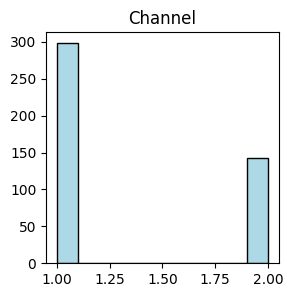

Region : 


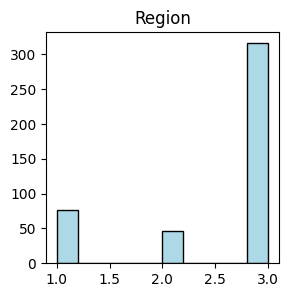

In [787]:
category_cols = ['Channel', 'Region']
for col in category_cols:
    print(f'{col} : ')
    plt.figure(figsize=(3, 3))
    plt.hist(df[col], color='lightblue', edgecolor='black')
    plt.title(col)
    plt.show()

In [788]:
# numeric columns (연속형 데이터)
numeric_cols = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
df[numeric_cols].describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


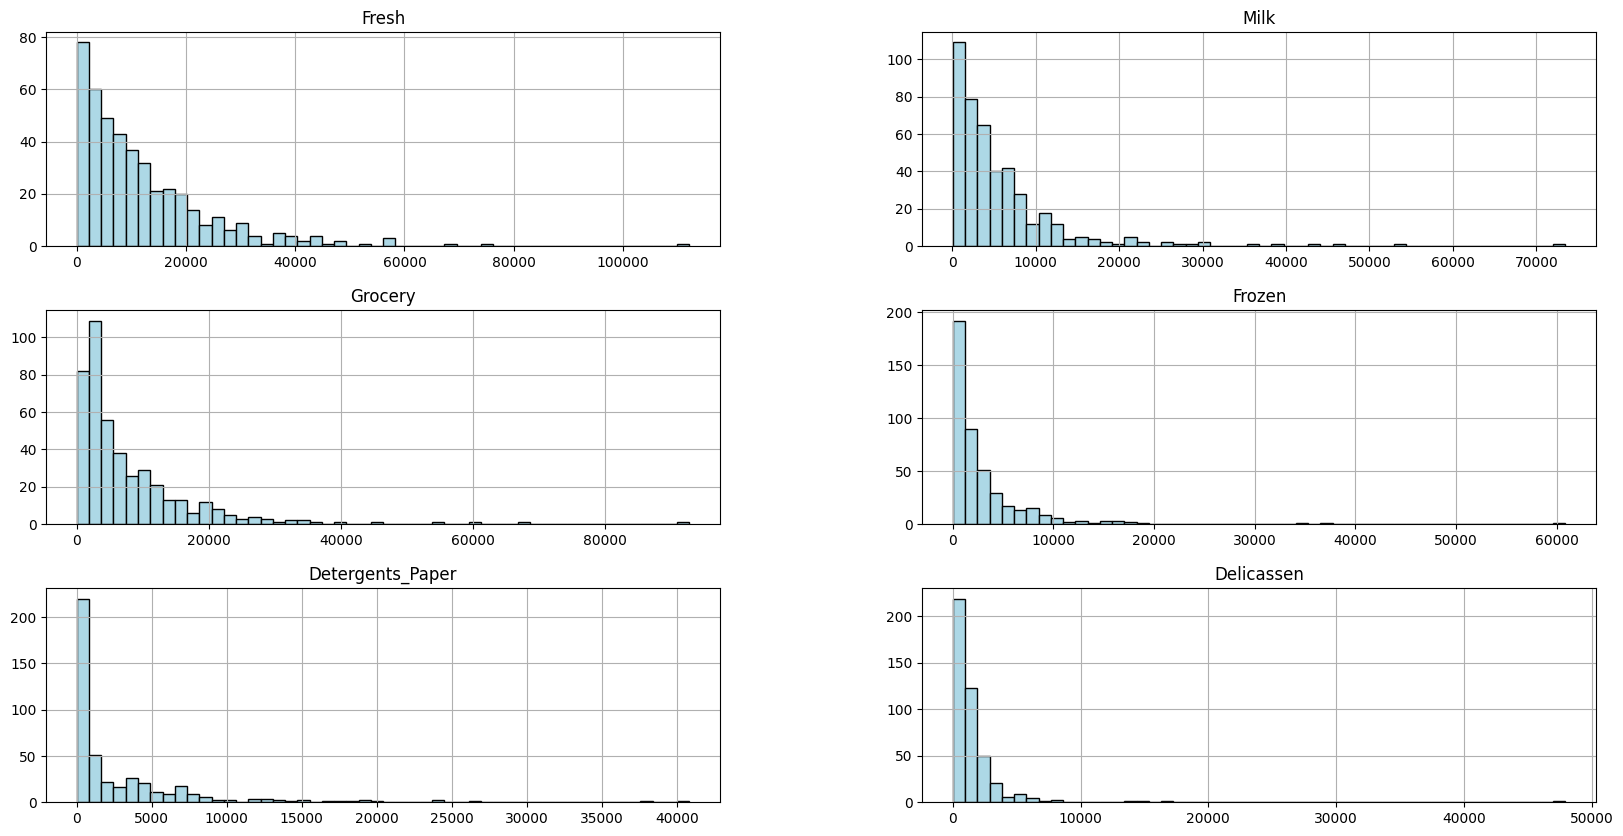

In [789]:
# distribution of numeric feature
'''
need outlier & normalization preprocessing
'''
# plot
df[numeric_cols].hist(figsize=(20, 10), color='lightblue', edgecolor='black', bins=50)
plt.show()

In [790]:
# skew distribution
for col in numeric_cols:
    print(f'{col} :', df[col].skew())

Fresh : 2.561322751927935
Milk : 4.053754849210881
Grocery : 3.5874286903915453
Frozen : 5.9079856924559575
Detergents_Paper : 3.6318506306913645
Delicassen : 11.151586478906117


## preprocessing

In [791]:
# encoding
# => catergory features has already been converted to an integer
# => but, one-hot encoding can be tried !

In [792]:
df.head(2)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776


- **one-hot encoding**

In [793]:
category_cols

['Channel', 'Region']

In [794]:
# encoding
encoded = pd.get_dummies(data=df[category_cols], columns=['Channel', 'Region'])
encoded.head(2)

,Channel_1,Channel_2,Region_1,Region_2,Region_3
0,0,1,0,0,1
1,0,1,0,0,1


In [795]:
df.drop(columns=category_cols, axis=1, inplace=True)
df.head(2)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776


In [796]:
# concat
df = pd.concat([df, encoded], axis=1)
df.head(2)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_1,Channel_2,Region_1,Region_2,Region_3
0,12669,9656,7561,214,2674,1338,0,1,0,0,1
1,7057,9810,9568,1762,3293,1776,0,1,0,0,1


In [797]:
df.isnull().sum()

Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
Channel_1           0
Channel_2           0
Region_1            0
Region_2            0
Region_3            0
dtype: int64

- **outlier (제외)**

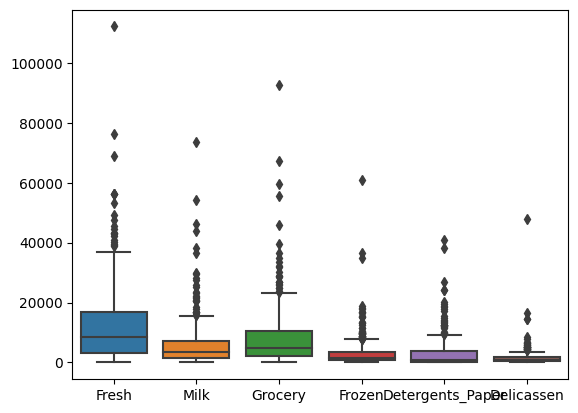

In [715]:
# check oulier
sns.boxplot(data=df[numeric_cols])
plt.show()

In [716]:
# check data range
for col in numeric_cols:

    print(f'{col} :')

    # Q1 & Q3
    Q3 = np.percentile(df[col], 75)
    Q1 = np.percentile(df[col], 25)
    
    # IQR & min/max
    IQR = Q3 - Q1
    min = Q1 - 1.5 * IQR
    max = Q3 + 1.5 * IQR
    print(f'({df[col].min()}, {df[col].max()})') # data min, max
    print(f'({min}, {max})') # range

Fresh :
(3, 112151)
(-17581.25, 37642.75)
Milk :
(55, 73498)
(-6952.875, 15676.125)
Grocery :
(3, 92780)
(-10601.125, 23409.875)
Frozen :
(25, 60869)
(-3475.75, 7772.25)
Detergents_Paper :
(3, 40827)
(-5241.125, 9419.875)
Delicassen :
(3, 47943)
(-1709.75, 3938.25)


Fresh :
0 20
Milk :
0 28
Grocery :
0 24
Frozen :
0 43
Detergents_Paper :
0 30
Delicassen :
0 27


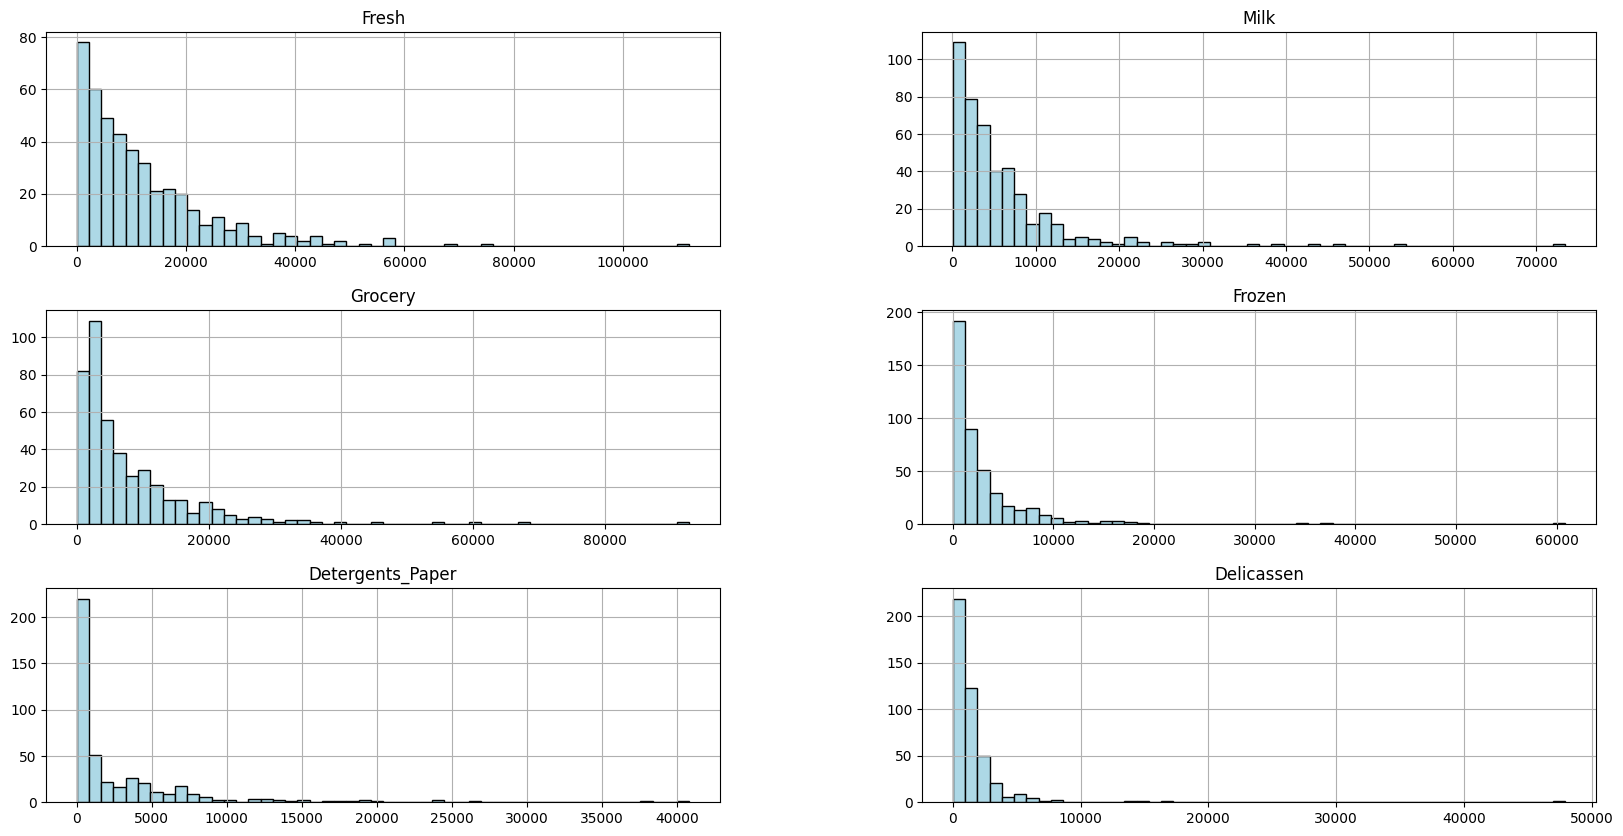

In [717]:
# outlier
for col in numeric_cols:

    print(f'{col} :')
    target = df[col]

    # Q1 & Q3
    Q3 = np.percentile(df[col], 75)
    Q1 = np.percentile(df[col], 25)
    
    # IQR & min/max
    IQR = Q3 - Q1
    min = Q1 - 1.5 * IQR
    max = Q3 + 1.5 * IQR

    # check outlier
    outlier1 = target[target < min]
    outlier2 = target[target > max]
    print(len(outlier1), len(outlier2))

# plot
df[numeric_cols].hist(figsize=(20, 10), color='lightblue', edgecolor='black', bins=50)
plt.show()

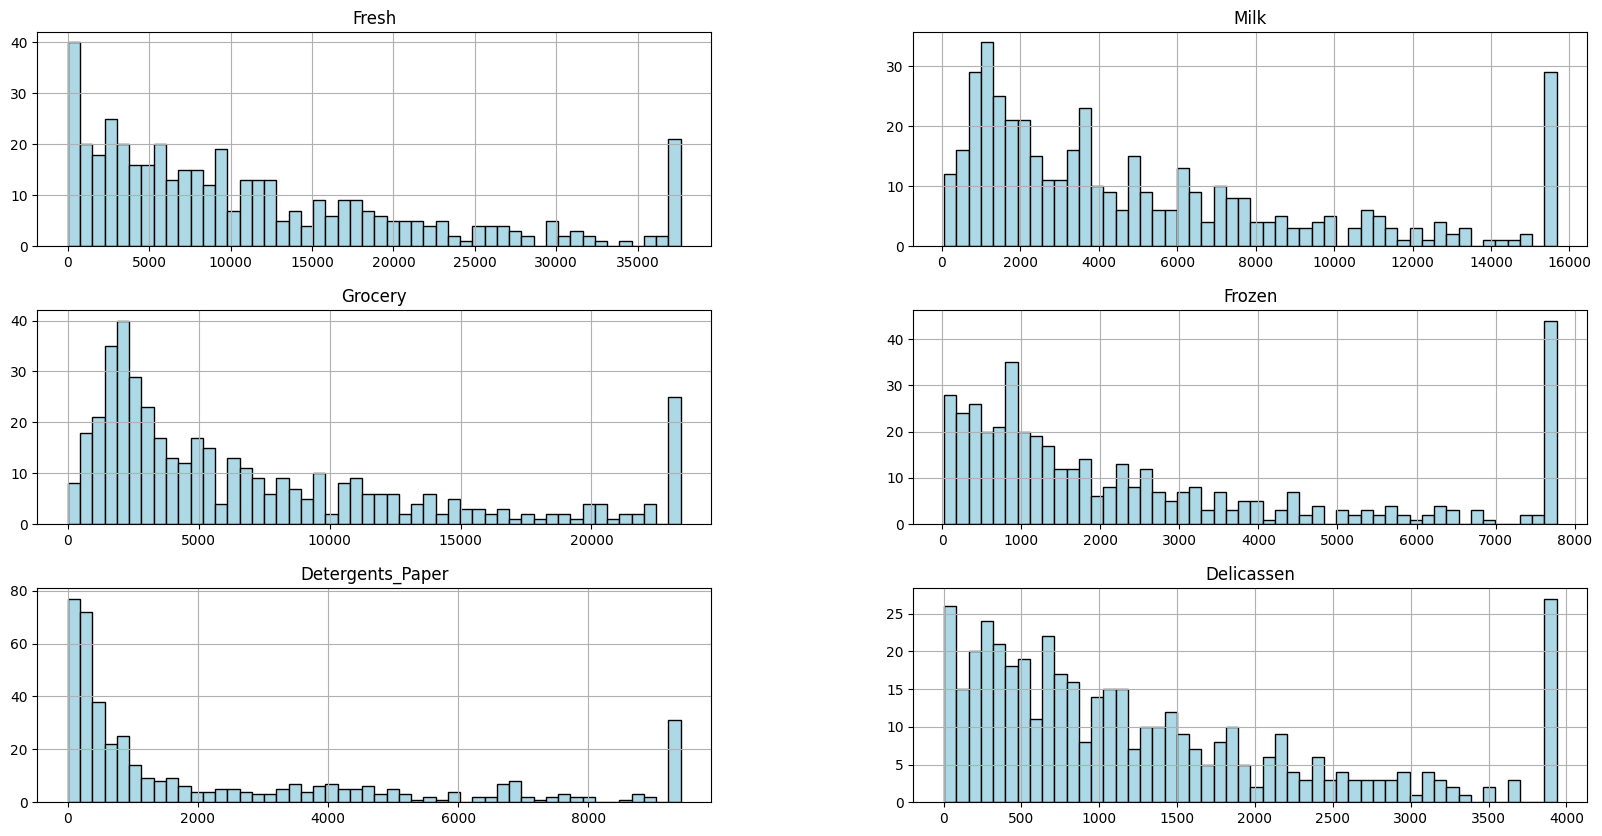

In [718]:
# replace outlier
for col in numeric_cols:

    # print(f'{col} :')
    target = df[col]

    # Q1 & Q3
    Q3 = np.percentile(df[col], 75)
    Q1 = np.percentile(df[col], 25)
    
    # IQR & min/max
    IQR = Q3 - Q1
    min = Q1 - 1.5 * IQR
    max = Q3 + 1.5 * IQR
    
    # replace outlier
    target[target < min] = round(min)
    target[target > max] = round(max)

# plot
df[numeric_cols].hist(figsize=(20, 10), color='lightblue', edgecolor='black', bins=50)
plt.show()

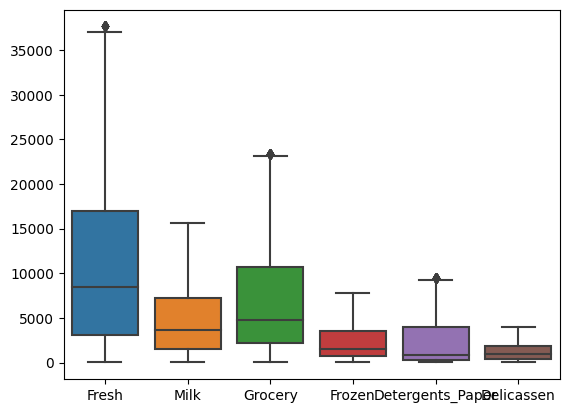

In [719]:
# check oulier
sns.boxplot(data=df[numeric_cols])
plt.show()

In [720]:
df.head(2)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_1,Channel_2,Region_1,Region_2,Region_3
0,12669,9656,7561,214,2674,1338,0,1,0,0,1
1,7057,9810,9568,1762,3293,1776,0,1,0,0,1


- **normalization**

In [798]:
# log normalization because of skew data
# => to fit within a certain range

scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

'''
# log1p because of skew distribution
df[numeric_cols] = np.log(df[numeric_cols])

# check skew
for col in numeric_cols:
    print(f'{col} : {df[col].skew()}')

# plot distribution
print()
for col in numeric_cols:
    print(f'{col} : ')
    plt.figure(figsize=(3, 3))
    unique = len(df[col].unique())
    plt.hist(df[col], bins=50, color='lightblue', edgecolor='black')
    plt.show()
'''

"\n# log1p because of skew distribution\ndf[numeric_cols] = np.log(df[numeric_cols])\n\n# check skew\nfor col in numeric_cols:\n    print(f'{col} : {df[col].skew()}')\n\n# plot distribution\nprint()\nfor col in numeric_cols:\n    print(f'{col} : ')\n    plt.figure(figsize=(3, 3))\n    unique = len(df[col].unique())\n    plt.hist(df[col], bins=50, color='lightblue', edgecolor='black')\n    plt.show()\n"

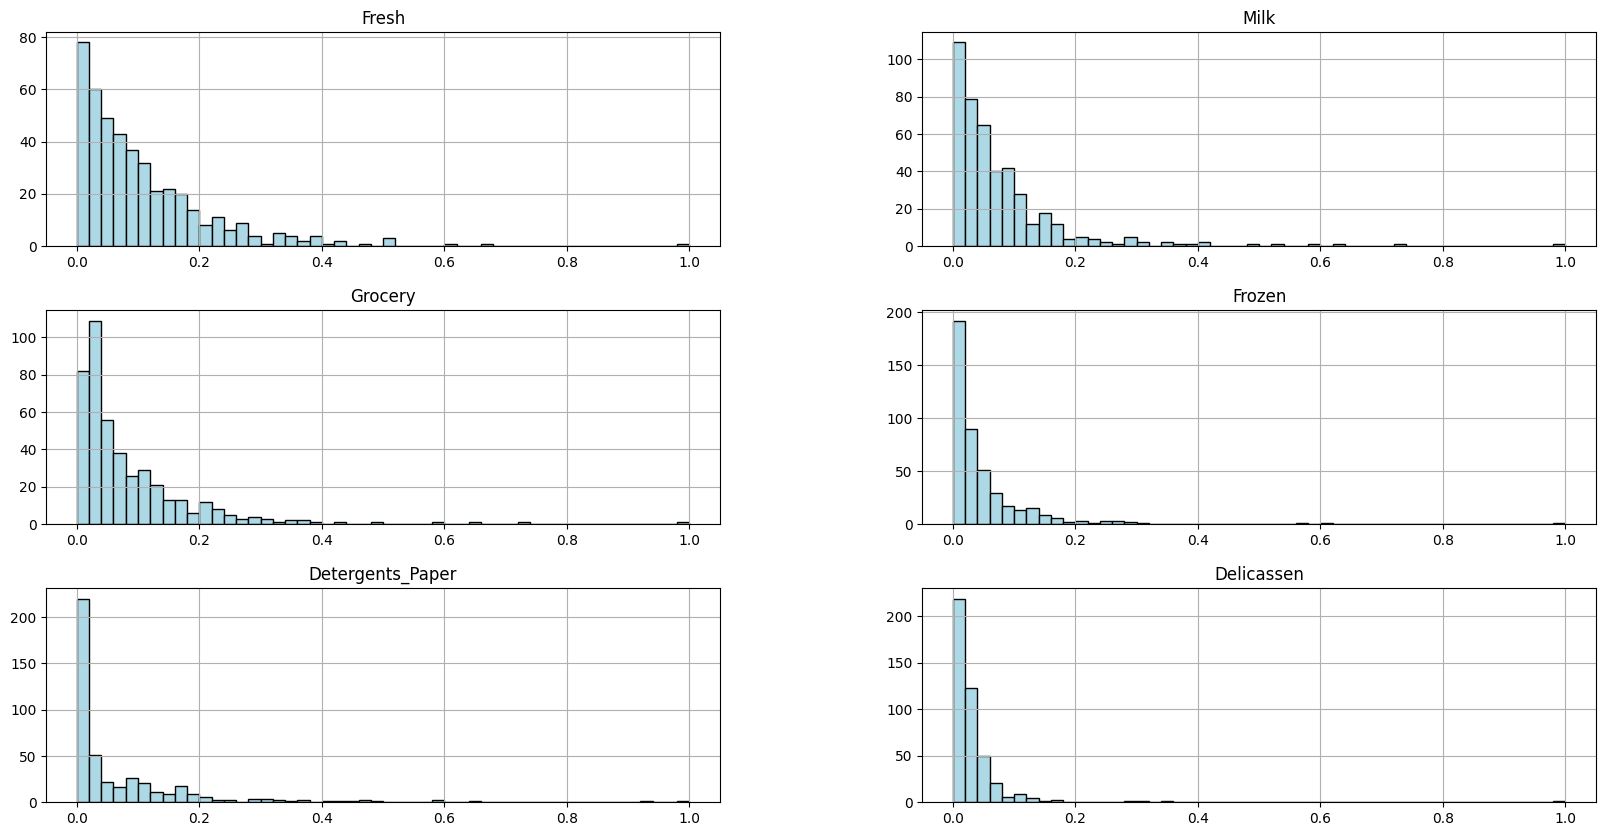

In [799]:
# plot
df[numeric_cols].hist(figsize=(20, 10), color='lightblue', edgecolor='black', bins=50)
plt.show()

In [800]:
df.head(2)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_1,Channel_2,Region_1,Region_2,Region_3
0,0.112940,0.130727,0.081464,0.003106,0.065427,0.027847,0,1,0,0,1
1,0.062899,0.132824,0.103097,0.028548,0.080590,0.036984,0,1,0,0,1


## model

In [801]:
# find optimal k
# 1) Elbow Method
# 2) Silhouette

Done. (find optimal k)


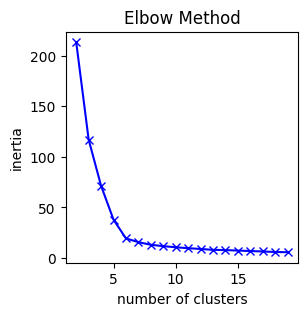

Done. (plot elbow method)


In [802]:
# 1) Elbow Method
inertia = []
k_range = range(2, 20)

# find optimal k
for k in k_range:

    kmeans = KMeans(n_clusters=k, max_iter=1000, random_state=0)
    kmeans.fit(df)

    inertia_val = kmeans.inertia_
    inertia.append(inertia_val)

print('Done. (find optimal k)')

plt.figure(figsize=(3, 3))
plt.plot(k_range, inertia, 'bx-')
plt.title('Elbow Method')
plt.xlabel('number of clusters')
plt.ylabel('inertia')
plt.show()

print('Done. (plot elbow method)')

best k : 6
best silhouette : 0.8486555986404499
Done. (find optimal k)


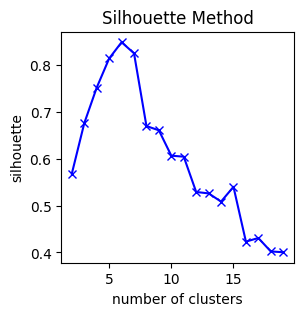

Done. (plot elbow method)


In [803]:
# 2) Silhouette
silhouette = []
k_range = range(2, 20)

# find optimal k
best_silhouette, best_k = -1, -1

for k in k_range:

    kmeans = KMeans(n_clusters=k, max_iter=1000, random_state=0)
    kmeans.fit(df)
    clusters = kmeans.predict(df)

    silhouette_val = silhouette_score(df, clusters)
    silhouette.append(silhouette_val)

    if silhouette_val > best_silhouette:
        best_silhouette = silhouette_val
        best_k = k

print(f'best k : {best_k}')
print(f'best silhouette : {best_silhouette}')
print('Done. (find optimal k)')

plt.figure(figsize=(3, 3))
plt.plot(k_range, silhouette, 'bx-')
plt.title('Silhouette Method')
plt.xlabel('number of clusters')
plt.ylabel('silhouette')
plt.show()

print('Done. (plot elbow method)')

In [804]:
# train model
# 1) kmeans
# 2) dbscan

In [805]:
# optimal k value
optimal_k = 6

# kmeans
km = KMeans(n_clusters=optimal_k, max_iter=1000, random_state=0)
# model train and predict
cluster_label = km.fit_predict(df)
# label
df['label'] = cluster_label

# cluster centers
centers = km.cluster_centers_
# cluster labels
labels = km.labels_

In [806]:
# check add labels
df.head(2)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_1,Channel_2,Region_1,Region_2,Region_3,label
0,0.112940,0.130727,0.081464,0.003106,0.065427,0.027847,0,1,0,0,1,2
1,0.062899,0.132824,0.103097,0.028548,0.080590,0.036984,0,1,0,0,1,2


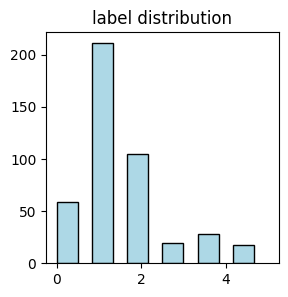

In [807]:
# check label distribution
plt.figure(figsize=(3, 3))
plt.hist(labels, bins=optimal_k, width=0.5, color='lightblue', edgecolor='black')
plt.title('label distribution')
plt.show()

## result

- **clusters**

In [808]:
df['label'].value_counts() # total 6 clusters

1    211
2    105
0     59
4     28
3     19
5     18
Name: label, dtype: int64

In [817]:
clusters = df.groupby(by=['label'])
clusters

- **cluster0**

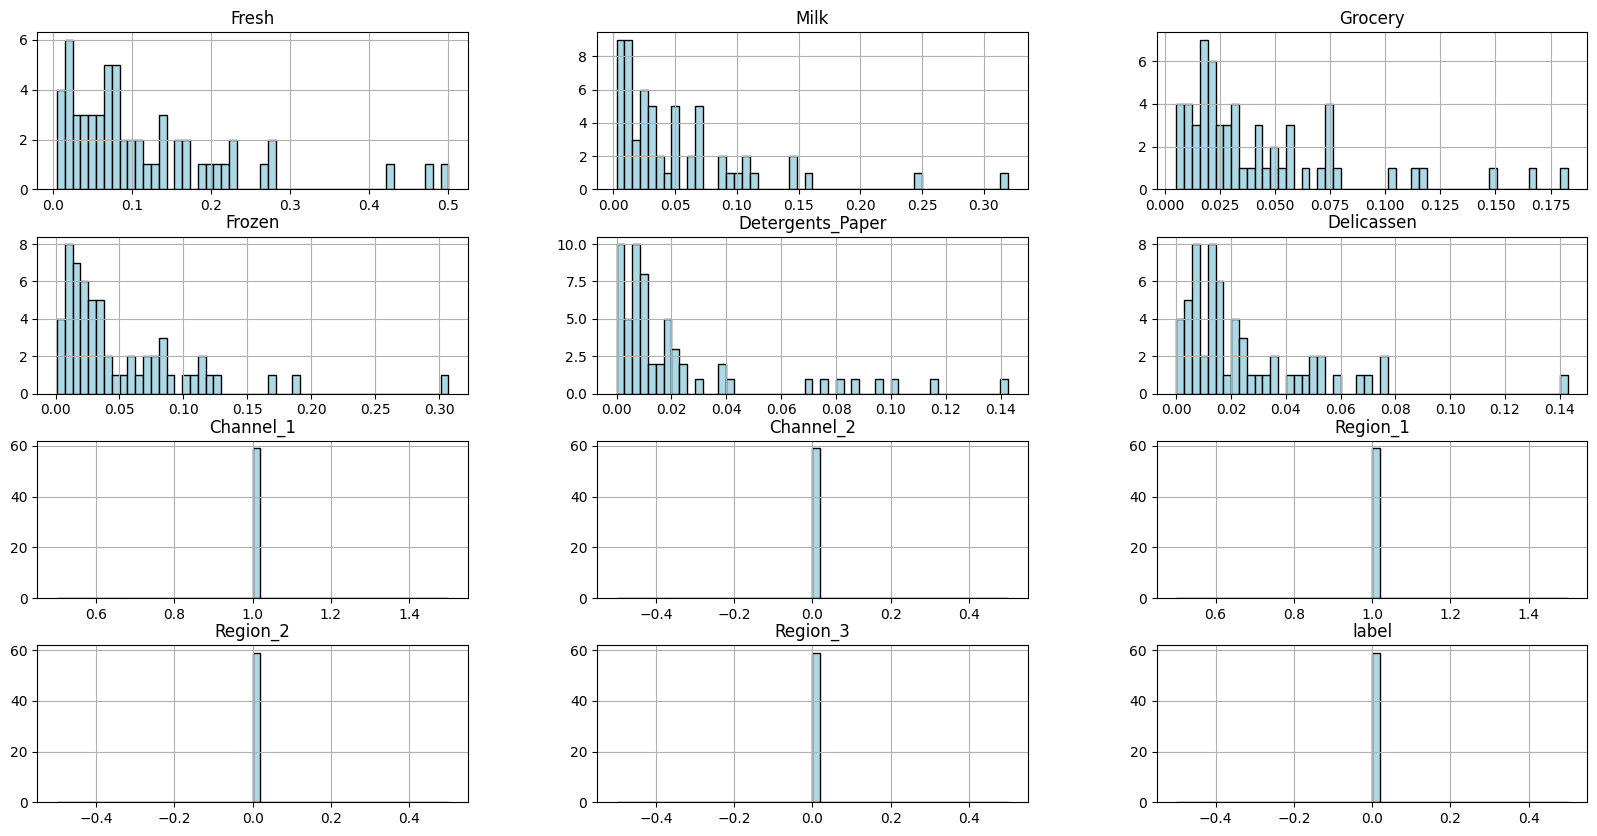

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000
mean,0.115020,0.051948,0.043364,0.050988,0.023210,0.024909
std,0.110051,0.058526,0.039122,0.053850,0.031989,0.025447
min,0.004556,0.002764,0.005238,0.001085,0.000049,0.000083
25%,0.039541,0.013834,0.017429,0.015466,0.005732,0.007739
50%,0.077157,0.030296,0.027733,0.030143,0.010019,0.015561
75%,0.161679,0.067270,0.055720,0.073204,0.021335,0.033761
max,0.500054,0.319595,0.182836,0.307113,0.142686,0.142908


In [823]:
cluster0 = clusters.get_group(0)

# category cols 
# => only Horeca
# => only Lisbon
cluster0.hist(figsize=(20, 10), color='lightblue', edgecolor='black', bins=50)
plt.show()

# numeric cols
cluster0[numeric_cols].describe()

- **cluster2**

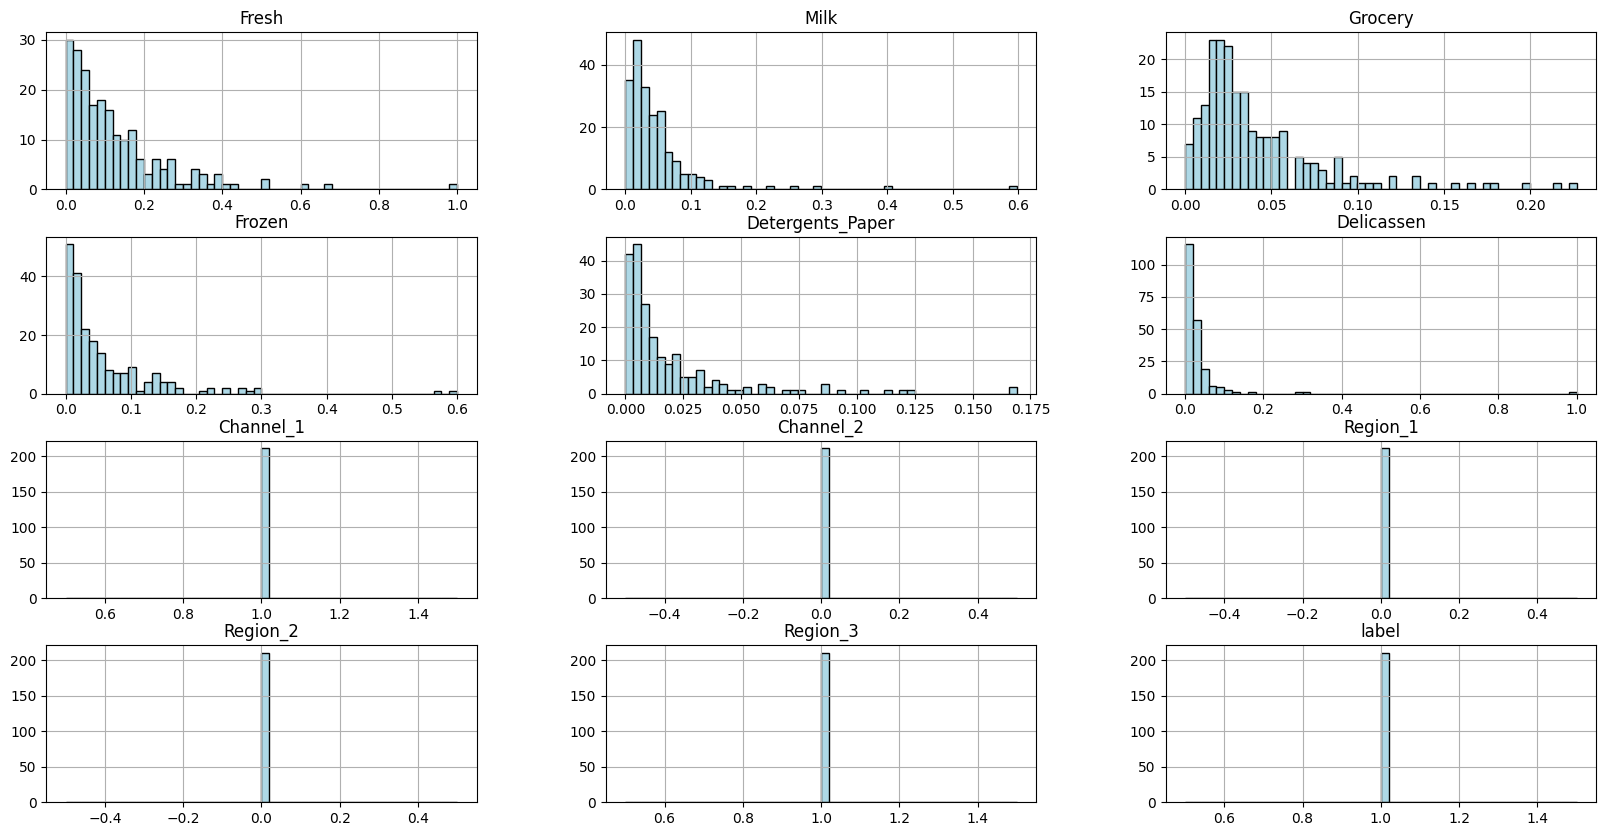

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000
mean,0.123721,0.046730,0.041861,0.059692,0.019197,0.031608
std,0.131492,0.061388,0.038733,0.081464,0.026944,0.076412
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.032988,0.015434,0.017925,0.012392,0.004250,0.007833
50%,0.085681,0.029846,0.028445,0.031803,0.009112,0.017105
75%,0.167796,0.056506,0.053079,0.074247,0.023160,0.032937
max,1.000000,0.597674,0.226770,0.600043,0.169116,1.000000


In [824]:
cluster1 = clusters.get_group(1)

# category cols
# => only Horeca
# => Region except Lisbon & Oporto
cluster1.hist(figsize=(20, 10), color='lightblue', edgecolor='black', bins=50)
plt.show()

# numeric cols
cluster1[numeric_cols].describe()

- **cluster2**

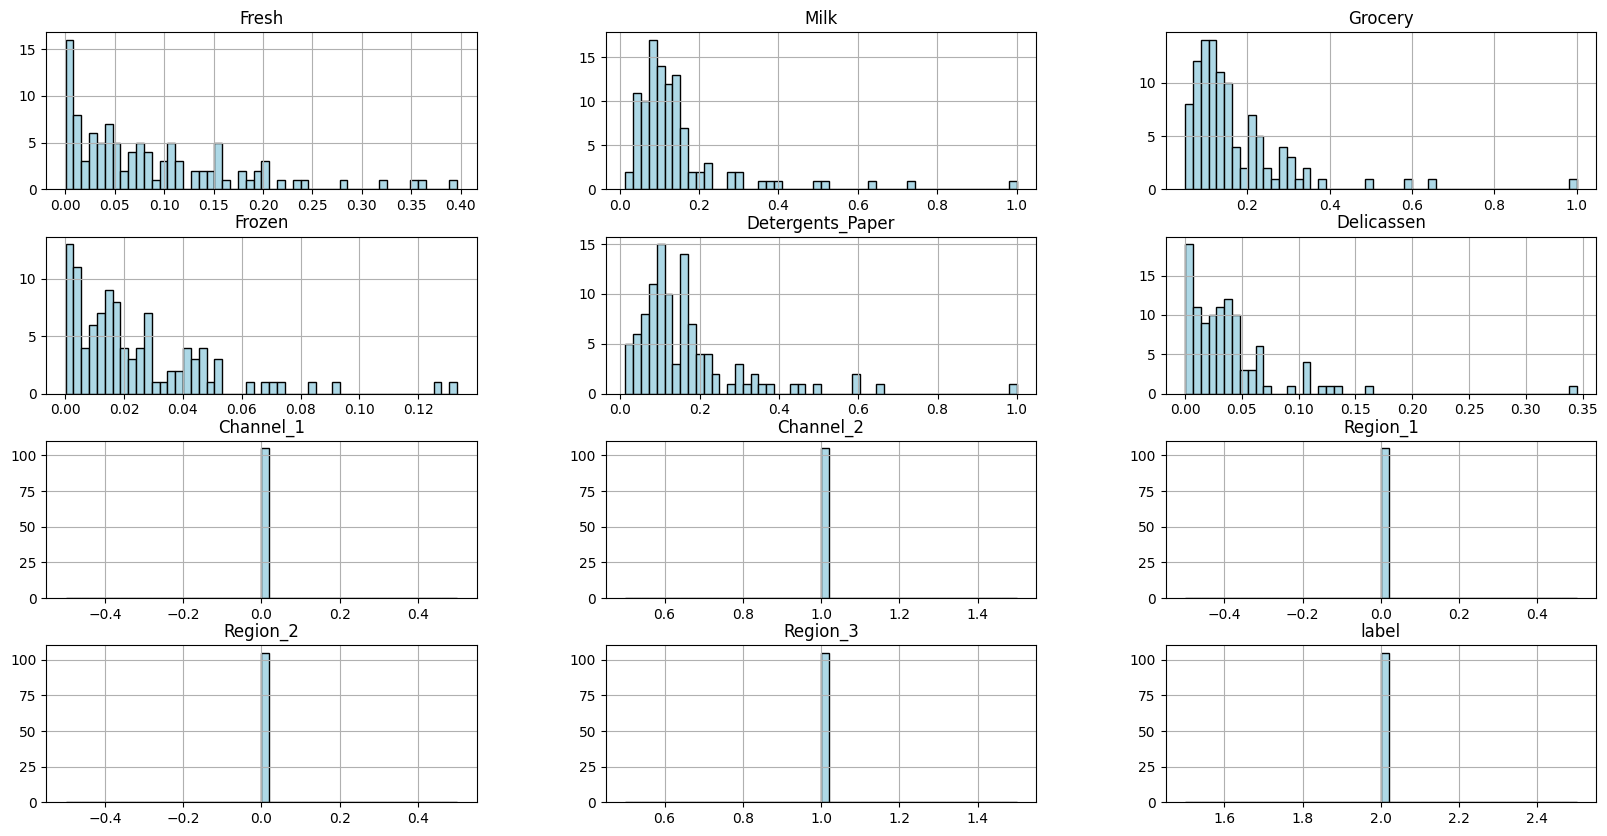

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000
mean,0.087639,0.148769,0.171926,0.024459,0.168926,0.038031
std,0.085917,0.143987,0.132564,0.024727,0.147513,0.044202
min,0.000178,0.014556,0.048719,0.000131,0.012738,0.000000
25%,0.020865,0.082690,0.098807,0.006771,0.086567,0.011306
50%,0.065619,0.106069,0.130614,0.016994,0.125367,0.028849
75%,0.134403,0.150579,0.213437,0.035649,0.187978,0.044952
max,0.396467,1.000000,1.000000,0.133242,1.000000,0.344597


In [825]:
cluster2 = clusters.get_group(2)

# category cols 
# => only Retail
# => Region except Lisbon & Oporto
cluster2.hist(figsize=(20, 10), color='lightblue', edgecolor='black', bins=50)
plt.show()

# numeric cols
cluster2[numeric_cols].describe()

- **cluster3**

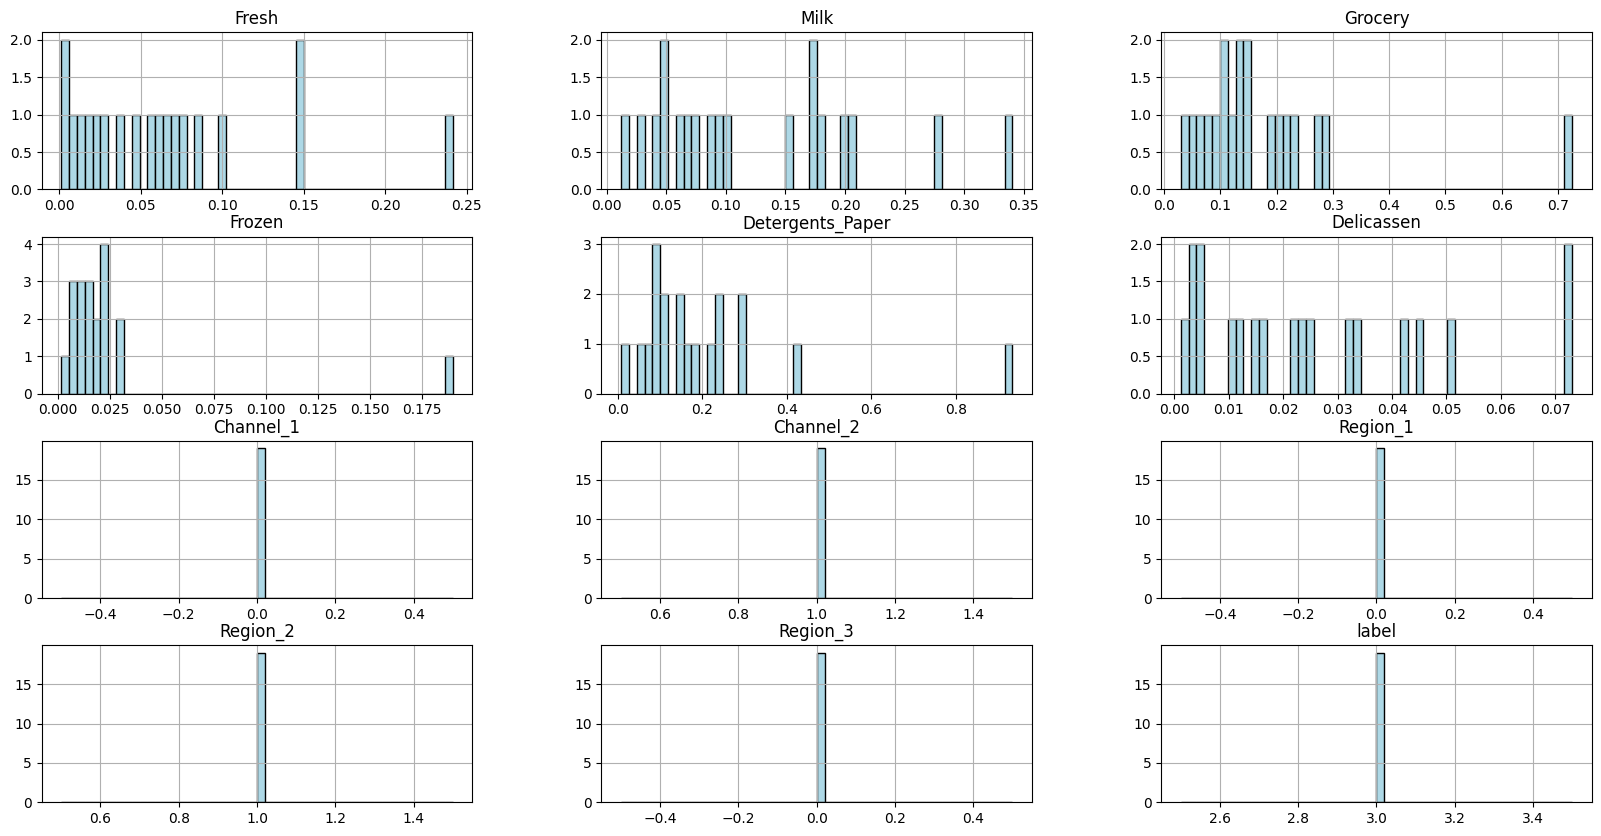

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,0.064975,0.124393,0.175941,0.024909,0.205939,0.025782
std,0.061240,0.090020,0.151282,0.040649,0.202987,0.022224
min,0.001409,0.011887,0.029533,0.001742,0.008059,0.001168
25%,0.021088,0.055737,0.100407,0.010100,0.095459,0.008125
50%,0.057647,0.092071,0.134365,0.014940,0.152680,0.021569
75%,0.081669,0.177995,0.213226,0.022763,0.240900,0.037797
max,0.241458,0.340618,0.725341,0.189567,0.933250,0.073112


In [826]:
cluster3 = clusters.get_group(3)

# category cols 
# => only Retail
# => only Oporto
cluster3.hist(figsize=(20, 10), color='lightblue', edgecolor='black', bins=50)
plt.show()

# numeric cols
cluster3[numeric_cols].describe()

- **cluster4**

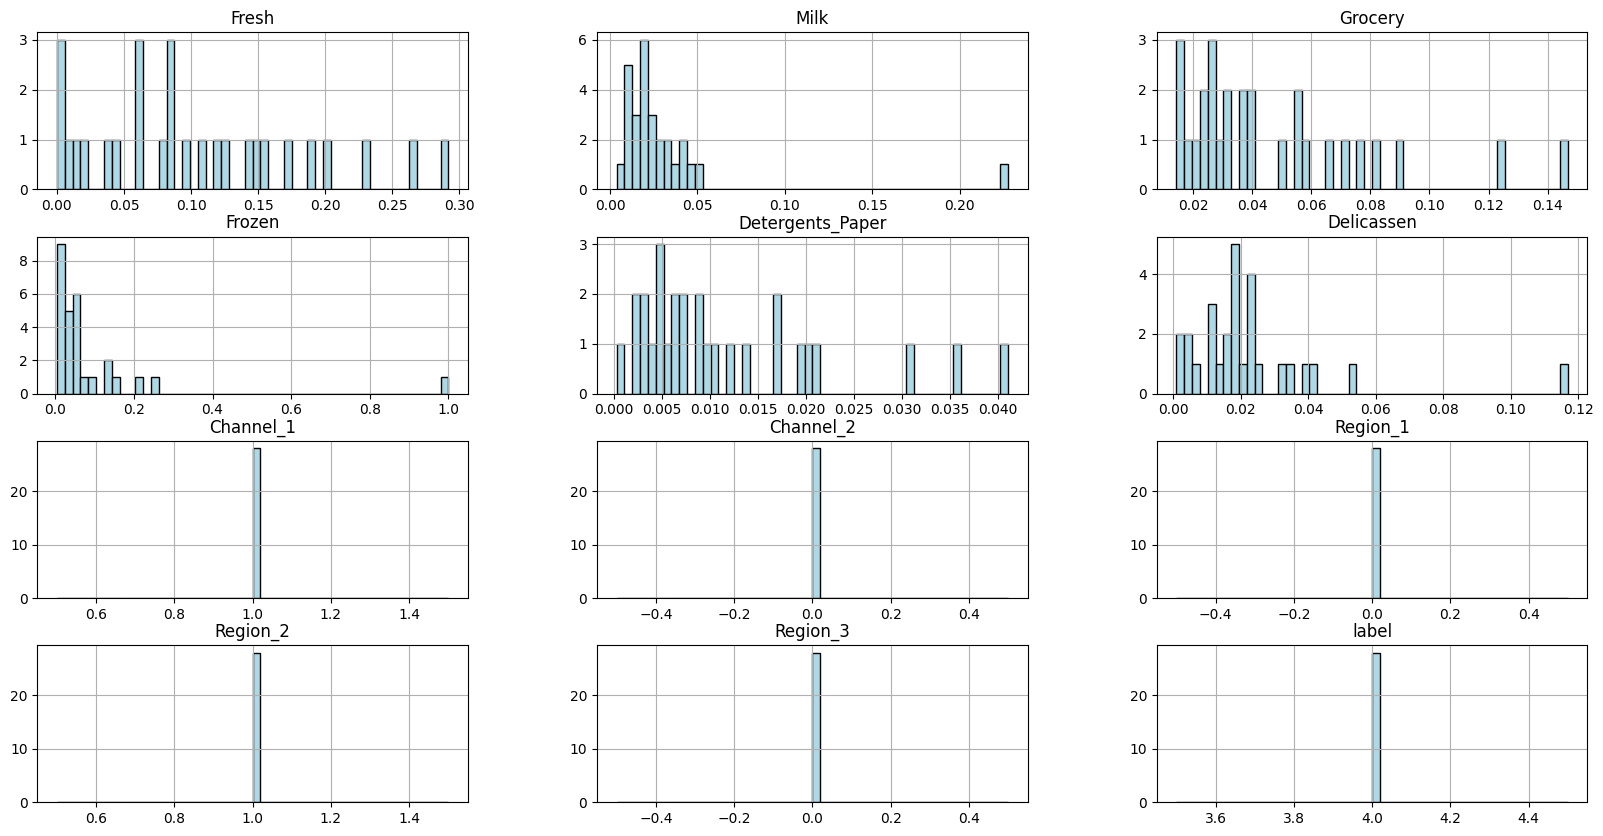

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000
mean,0.103859,0.030626,0.047345,0.094012,0.011751,0.023006
std,0.079978,0.040421,0.032856,0.188260,0.010418,0.022044
min,0.000000,0.003785,0.014303,0.003928,0.000294,0.001001
25%,0.044007,0.014855,0.025553,0.015404,0.004403,0.011770
50%,0.087242,0.020499,0.036097,0.043907,0.007888,0.018356
75%,0.151840,0.031177,0.059546,0.075472,0.017245,0.023842
max,0.291704,0.227782,0.146836,1.000000,0.041054,0.116938


In [827]:
cluster4 = clusters.get_group(4)

# category cols 
# => only Horeca
# => only Oporto
cluster4.hist(figsize=(20, 10), color='lightblue', edgecolor='black', bins=50)
plt.show()

# numeric cols
cluster4[numeric_cols].describe()

- **cluster5**

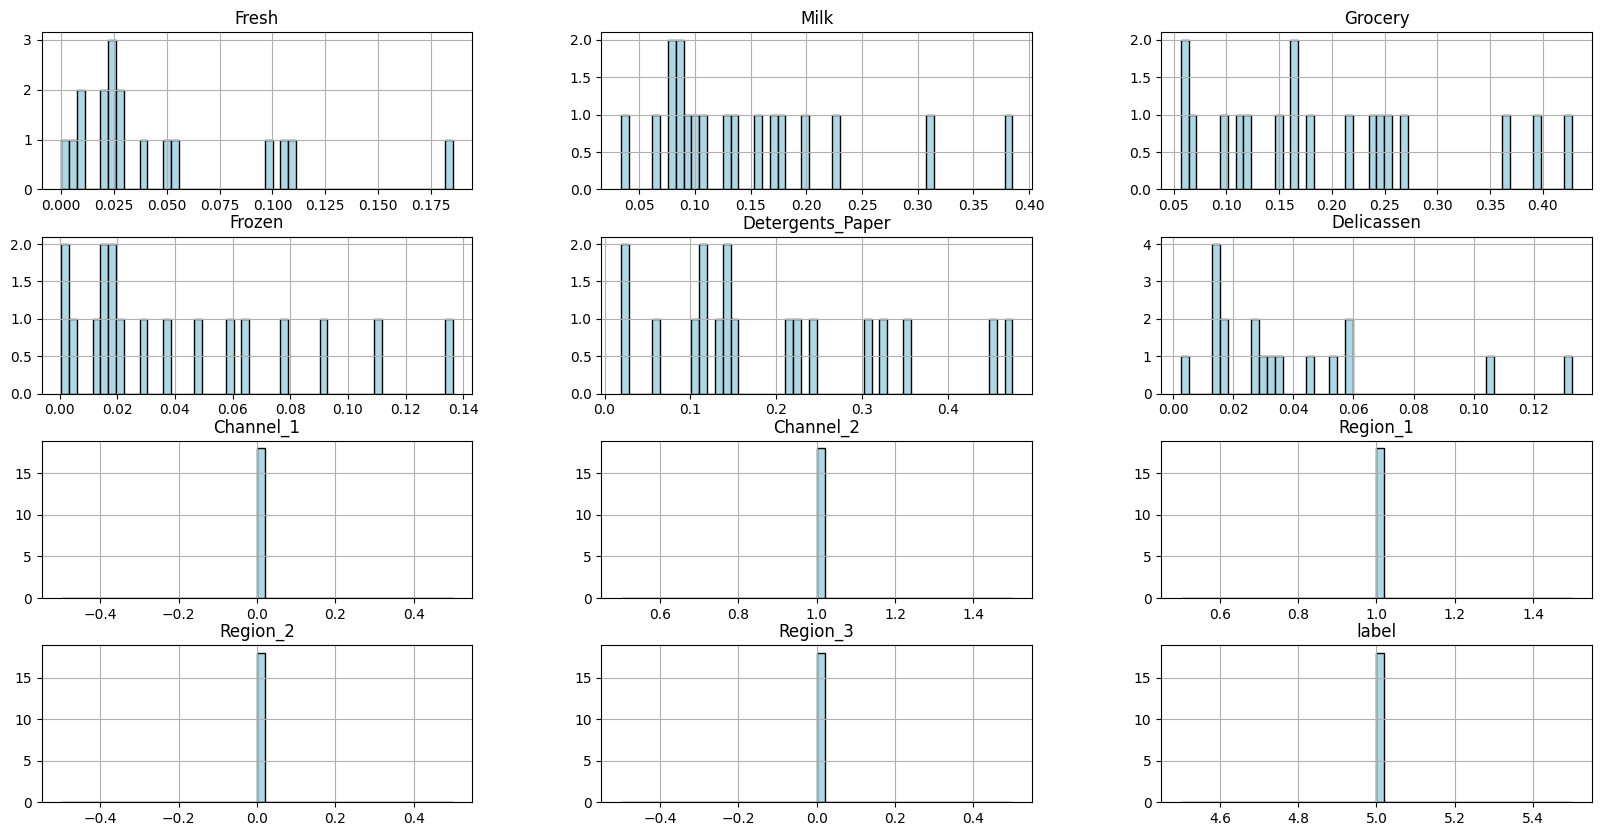

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,0.046341,0.146086,0.199068,0.042060,0.201408,0.038985
std,0.048289,0.089991,0.112255,0.039852,0.135114,0.033928
min,0.000134,0.033659,0.056717,0.000592,0.019229,0.002441
25%,0.021180,0.084395,0.114589,0.014767,0.117951,0.015499
50%,0.026064,0.119971,0.173567,0.024604,0.151235,0.029433
75%,0.053367,0.177788,0.253034,0.062751,0.289089,0.051179
max,0.185282,0.384938,0.427811,0.136349,0.475382,0.132854


In [828]:
cluster5 = clusters.get_group(5)

# category cols 
# => only Retail
# => only Lisbon
cluster5.hist(figsize=(20, 10), color='lightblue', edgecolor='black', bins=50)
plt.show()

# numeric cols
cluster5[numeric_cols].describe()